In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

In [4]:
# Fake Data
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [5]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [6]:
# Model fit and SUmmary
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.944e+06
Date:                Fri, 20 May 2022   Prob (F-statistic):          1.24e-243
Time:                        14:40:43   Log-Likelihood:                -136.19
No. Observations:                 100   AIC:                             278.4
Df Residuals:                      97   BIC:                             286.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8170      0.282      2.896      0.005       0.257       1.377
x1             0.2204      0.130      1.690      0.094      -0.038       0.479
x2             9.9882      0.013    791.791      0.000       9.963      10.013
==============================================================================
Omnibus:                        2.646   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.329
Skew:                           0.374   Prob(JB):                        0.312
Kurtosis:                       3.029   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
print("R2: ", res.rsquared)

R2:  0.9999901904321868


## OLS non-linear curve but linear parameters

In [15]:
# Fake Data again
nsample = 100
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.5, 0.5, -0.02, 5.])
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) # Adds noise    

In [16]:
res_2 = sm.OLS(y, X).fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     351.7
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.25e-51
Time:                        14:48:54   Log-Likelihood:                -78.176
No. Observations:                 100   AIC:                             164.4
Df Residuals:                      96   BIC:                             174.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4635      0.020     22.703      0.000       0.423       0.504
x2             0.5370      0.079      6.807      0.000       0.380       0.694
x3            -0.0171      0.002     -9.538      0.000      -0.021      -0.014
const          5.2259      0.132     39.480      0.000       4.963       5.489
==============================================================================
Omnibus:                        3.515   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.207
Skew:                           0.228   Prob(JB):                        0.201
Kurtosis:                       3.749   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print("Parameters: ", res_2.params)
print("Std Errors:", res_2.bse)
print("Predicted Values: ", res_2.predict())
print("R Squared", res_2.rsquared)

Parameters:  [ 0.46348143  0.53703708 -0.01711047  5.2258814 ]
Std Errors: [0.02041466 0.07889057 0.00179388 0.1323686 ]
Predicted Values:  [ 4.79811971  5.03337648  5.26285381  5.48234715  5.68800122  5.87646685
  6.04503715  6.19175766  6.31550581  6.4160366   6.49399255  6.55087758
  6.58899583  6.61135794  6.6215586   6.62363036  6.62187958  6.62071131
  6.62445006  6.637164    6.66249941  6.7035324   6.76264382  6.84142238
  6.94060007  7.06002235  7.19865447  7.35462354  7.52529469  7.70737829
  7.89706369  8.09017426  8.28233724  8.46916162  8.64641671  8.81020423
  8.95711687  9.08437689  9.18994908  9.27262352  9.33206485  9.36882585
  9.38432502  9.38078881  9.36116111  9.32898352  9.28825127  9.24325073
  9.19838507  9.15799517  9.12618307  9.1066451   9.10252156  9.11626898
  9.1495602   9.20321637  9.27717347  9.37048502  9.48136047  9.60723811
  9.74488921  9.89054939 10.04007169 10.18909525 10.33322271 10.46819904
 10.59008459 10.6954154  10.78134399 10.84575527 10.88735

In [28]:
def plot_compare(res):
    pfstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(x, y, 'o', label = 'data')
    ax.plot(x, y_true, 'b-', label='True')
    ax.plot(x, res.fittedvalues, 'r--', label='OLS')
    ax.plot(x, iv_u, 'g--', label="Error")
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc="best")

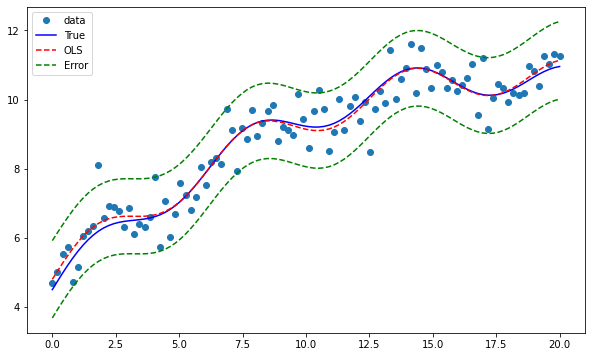

In [29]:
plot_compare(res_2)